In [28]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering
from sklearn.preprocessing import StandardScaler

In [29]:
univ = pd.read_csv("Universities.csv")

In [30]:
univ.head()

,Univ,SAT,Top10,Accept,SFRatio,Expenses,GradRate
0,Brown,1310,89,22,13,22704,94
1,CalTech,1415,100,25,6,63575,81
2,CMU,1260,62,59,9,25026,72
3,Columbia,1310,76,24,12,31510,88
4,Cornell,1280,83,33,13,21864,90


In [31]:
univ.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Univ      25 non-null     object
 1   SAT       25 non-null     int64 
 2   Top10     25 non-null     int64 
 3   Accept    25 non-null     int64 
 4   SFRatio   25 non-null     int64 
 5   Expenses  25 non-null     int64 
 6   GradRate  25 non-null     int64 
dtypes: int64(6), object(1)
memory usage: 1.5+ KB


In [13]:
univ=Univ.iloc[:,1:]

In [14]:
univ

,SAT,Top10,Accept,SFRatio,Expenses,GradRate
0,1310,89,22,13,22704,94
1,1415,100,25,6,63575,81
2,1260,62,59,9,25026,72
3,1310,76,24,12,31510,88
4,1280,83,33,13,21864,90
5,1340,89,23,10,32162,95
6,1315,90,30,12,31585,95
7,1255,74,24,12,20126,92
8,1400,91,14,11,39525,97
9,1305,75,44,7,58691,87


In [15]:
scaler=StandardScaler()

In [16]:
array=univ.values

In [18]:
v=scaler.fit_transform(array)

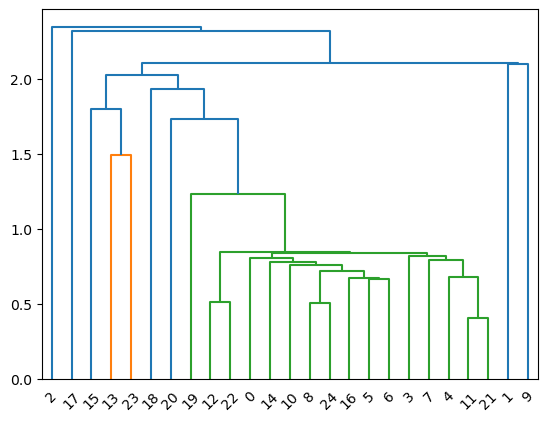

In [19]:
dendrogram=sch.dendrogram(sch.linkage(v,method='single'))

In [22]:
hc=AgglomerativeClustering(n_clusters=3,affinity='euclidean',linkage='single')

In [24]:
y=hc.fit_predict(v)

In [25]:
univ['cluster']=hc.labels_

In [26]:
univ

,SAT,Top10,Accept,SFRatio,Expenses,GradRate,cluster
0,1310,89,22,13,22704,94,0
1,1415,100,25,6,63575,81,0
2,1260,62,59,9,25026,72,1
3,1310,76,24,12,31510,88,0
4,1280,83,33,13,21864,90,0
5,1340,89,23,10,32162,95,0
6,1315,90,30,12,31585,95,0
7,1255,74,24,12,20126,92,0
8,1400,91,14,11,39525,97,0
9,1305,75,44,7,58691,87,0


In [27]:
univ.groupby(['cluster']).agg(['median']).reset_index()

,cluster,SAT,Top10,Accept,SFRatio,Expenses,GradRate
,,median,median,median,median,median,median
0,0,1290.0,83.0,33.0,12.0,28052.0,90.0
1,1,1260.0,62.0,59.0,9.0,25026.0,72.0
2,2,1075.0,49.0,67.0,25.0,8704.0,67.0
